# End-To-End House Price Prediction

## Problem Statement

The goal of this project is to build a robust machine learning model that can accurately predict house sale prices based on a variety of features describing the properties.

## Data

The dataset, compiled by Dean De Cock from kaggle site: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data

The dataset contains 82 explanatory variables capturing the physical characteristics of houses (e.g., number of rooms, square footage, year built), as well as location-specific and quality-related attributes. It includes a mix of numeric and categorical features, along with missing values, outliers, and skewed distributions, making it ideal for developing and testing real-world data preprocessing and regression modeling pipelines.

## Evaluation

To evaluate the effectiveness of the predictive models, I will use a combination of metrics and validation strategies that focus on both accuracy and generalization.

1. **Mean Absolute Error (MAE):** This will provide a clear interpretation of the model’s average prediction error in terms of absolute dollar value. It’s especially useful for understanding how far off the predictions are from actual house prices on average.

2. **Root Mean Squared Error (RMSE):** RMSE penalizes larger errors more heavily than MAE, which is important in housing predictions where large pricing errors can have significant implications.

3. **R² Score (Coefficient of Determination):** This metric will measure how well the model explains the variance in the target variable. A higher R² indicates a better fit to the data.

**Validation Strategy:**

To ensure the models are not overfitting and can generalize well to unseen data, I will use k-fold cross-validation. This approach will help evaluate the consistency of model performance across different subsets of the data.




## Features

Details to all 82 features can be shown here at kaggle site: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset/data

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

house = pd.read_csv("data/AmesHousing.csv")
house

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [2]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
house.isna().sum().sort_values(ascending=False)[:27]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [4]:
for label, content in house.items():
    if content.isna().sum() > 0:
        house[label+"_is_missing"] = content.isna()

In [5]:
# categorical columns where NA means none
none_fill_cols = ["Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type", "Fireplace Qu", "Garage Cond", "Garage Finish", "Garage Qual", "Garage Type",
                  'Bsmt Exposure', "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1"]
house[none_fill_cols]= house[none_fill_cols].fillna("None")

# numerical columns where NA means not present
zero_fill_cols = ["Mas Vnr Area", "Garage Yr Blt", "Garage Cars", "Garage Area",
                  "Bsmt Full Bath", "Bsmt Half Bath", "BsmtFin SF 1", 
                  "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF"]
house[zero_fill_cols] = house[zero_fill_cols].fillna(0)

# impute Electrical with mode
house["Electrical"] = house["Electrical"].fillna(house["Electrical"].mode()[0])




In [6]:
house.isna().sum().sort_values(ascending=False)

Lot Frontage               490
Order                        0
Enclosed Porch               0
Sale Condition               0
Sale Type                    0
                          ... 
Bsmt Exposure                0
Bsmt Cond                    0
Bsmt Qual                    0
Foundation                   0
Misc Feature_is_missing      0
Length: 109, dtype: int64

In [7]:
house["Lot Frontage"].value_counts()

Lot Frontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: count, Length: 128, dtype: int64

In [8]:
house["Lot Frontage"] = pd.to_numeric(house["Lot Frontage"], errors="coerce")

In [9]:
house["Lot Frontage"].dtype

dtype('float64')

In [10]:
house["Lot Frontage"] = (
    house.groupby("Neighborhood")["Lot Frontage"]
         .transform(lambda x: x.fillna(x.median()))
)

house["Lot Frontage"] = house["Lot Frontage"].fillna(house["Lot Frontage"].median())

C:\Users\HP\miniconda3\envs\churn_env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\miniconda3\envs\churn_env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
house["Lot Frontage"].value_counts()

Lot Frontage
60.0     301
70.0     203
80.0     191
50.0     117
65.0     109
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: count, Length: 130, dtype: int64

In [12]:
house

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Garage Type_is_missing,Garage Yr Blt_is_missing,Garage Finish_is_missing,Garage Cars_is_missing,Garage Area_is_missing,Garage Qual_is_missing,Garage Cond_is_missing,Pool QC_is_missing,Fence_is_missing,Misc Feature_is_missing
0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,...,False,False,False,False,False,False,False,True,True,True
1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,...,False,False,False,False,False,False,False,True,False,True
2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,...,False,False,False,False,False,False,False,True,True,False
3,4,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,...,False,False,False,False,False,False,False,True,True,True
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,None,IR1,Lvl,...,False,False,False,False,False,False,False,True,False,True
2926,2927,923276100,20,RL,74.0,8885,Pave,None,IR1,Low,...,False,False,False,False,False,False,False,True,False,True
2927,2928,923400125,85,RL,62.0,10441,Pave,None,Reg,Lvl,...,True,True,True,False,False,True,True,True,False,False
2928,2929,924100070,20,RL,77.0,10010,Pave,None,Reg,Lvl,...,False,False,False,False,False,False,False,True,True,True


## Exoloratory Data Analysis

In [13]:
import seaborn as sns
sns.set(font_scale=1.2)

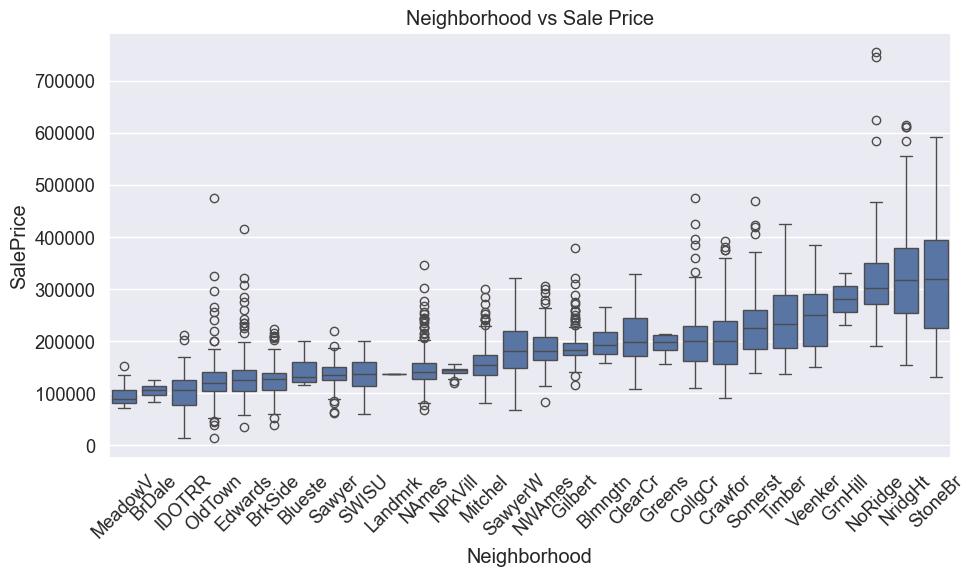

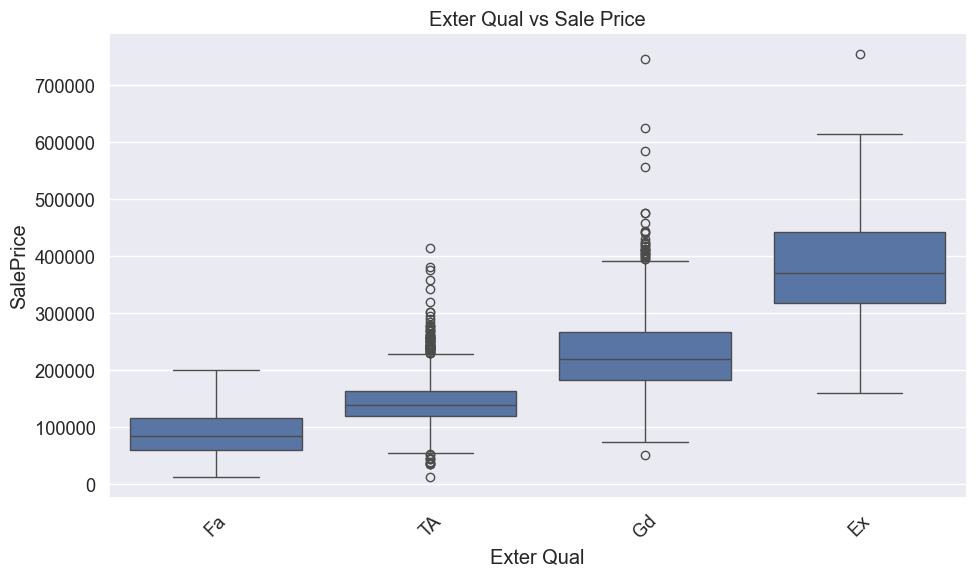

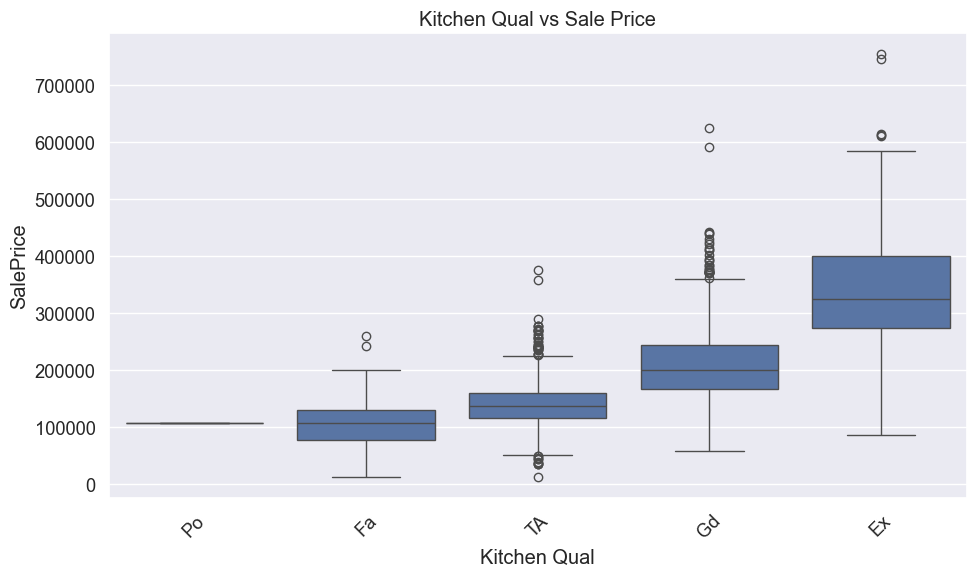

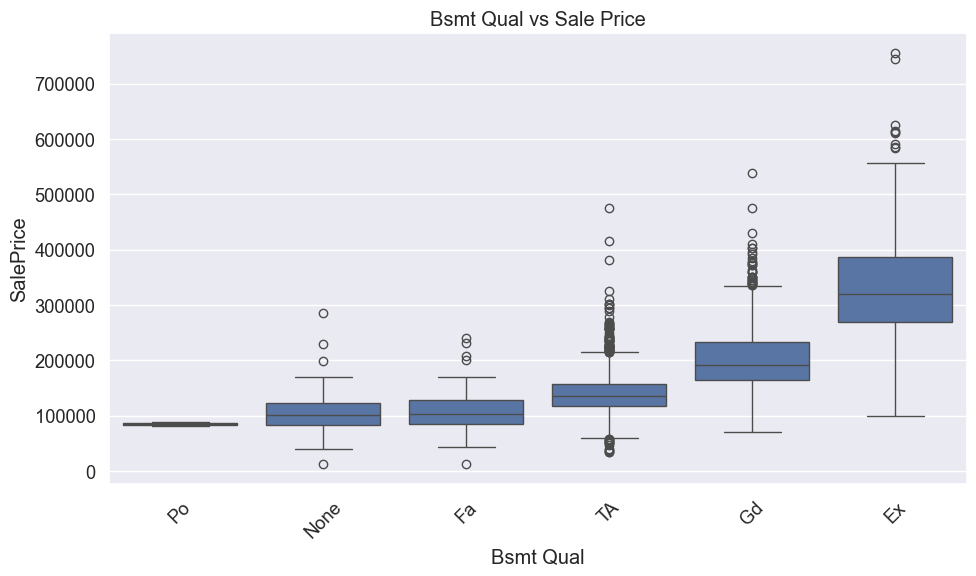

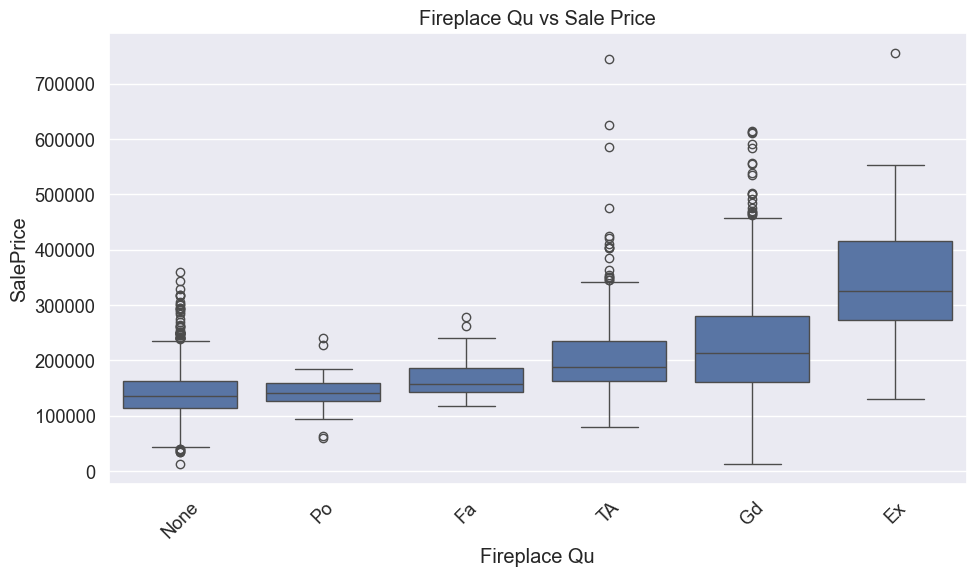

In [14]:
# Strong categorical/ordinal predictors
cat_features = ["Neighborhood", "Exter Qual", "Kitchen Qual", 
                "Bsmt Qual", "Fireplace Qu"]

for col in cat_features:
    plt.figure(figsize=(10, 6))

    order = house.groupby(col)["SalePrice"].median().sort_values().index

    sns.boxplot(data=house, x=col, y="SalePrice", order=order)
    plt.title(f"{col} vs Sale Price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Insights from Neighborhood and Quality Features
Analysis reveals that both location and quality ratings are key drivers of housing prices.

* **Neighborhood:** Properties in premium neighborhoods (NridgHt, StoneBr, NoRidge) tend to have the highest median sale prices, while areas such as MeadowV and BrDale have the lowest. This suggests strong location-based value differences in the market.

* **Quality Ratings:** Across basement quality (`Bsmt Qual`), fireplace quality (`Fireplace Qu`), exterior quality (`Exter Qual`), and kitchen quality (`Kitchen Qual`), a consistent trend emerges — higher quality ratings correspond to higher sale prices. Homes rated Excellent (Ex) or Good (Gd) command a substantial price premium compared to those rated Typical (TA), Fair (Fa), or Poor (Po).

These patterns indicate that buyers place significant value on both the neighborhood and the perceived quality of key home features, making them critical factors in predicting sale price.

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 109 entries, Order to Misc Feature_is_missing
dtypes: bool(27), float64(11), int64(28), object(43)
memory usage: 1.9+ MB


In [16]:
house.groupby("Neighborhood")["SalePrice"].median().sort_values()

Neighborhood
MeadowV     88250.0
BrDale     106000.0
IDOTRR     106500.0
OldTown    119900.0
Edwards    125000.0
BrkSide    126750.0
Blueste    130500.0
Sawyer     135000.0
SWISU      136200.0
Landmrk    137000.0
NAmes      140000.0
NPkVill    143750.0
Mitchel    153500.0
SawyerW    180000.0
NWAmes     181000.0
Gilbert    183000.0
Blmngtn    191500.0
ClearCr    197500.0
Greens     198000.0
CollgCr    200000.0
Crawfor    200624.0
Somerst    225500.0
Timber     232106.5
Veenker    250250.0
GrnHill    280000.0
NoRidge    302000.0
NridgHt    317750.0
StoneBr    319000.0
Name: SalePrice, dtype: float64

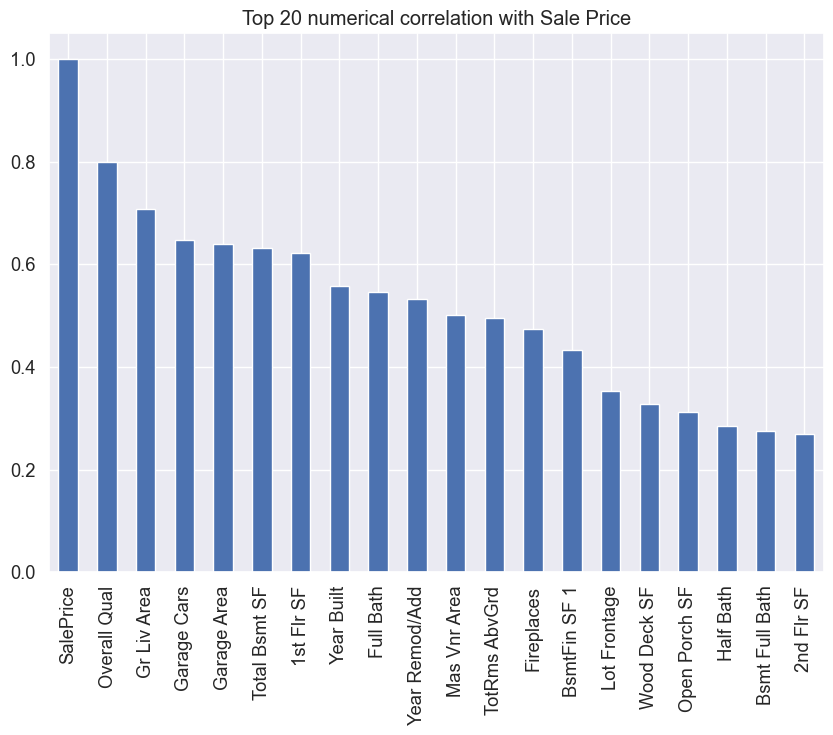

In [17]:
## Correlation with numerical columns
num_cols =  house.select_dtypes("number")

num_corr = num_cols.corr()

corr_saleprice = num_corr["SalePrice"].sort_values(ascending=False)[:20]

corr_saleprice.plot.bar(figsize=(10, 7), title="Top 20 numerical correlation with Sale Price");


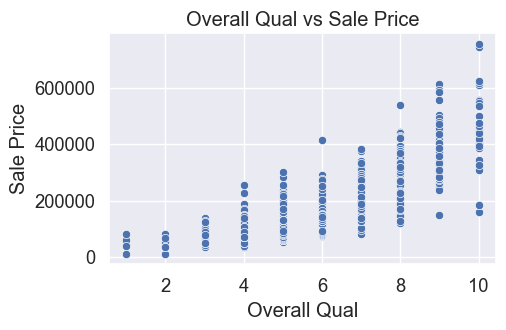

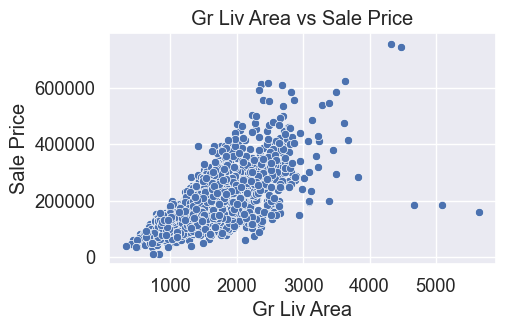

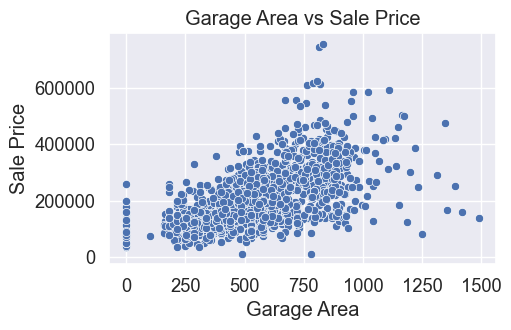

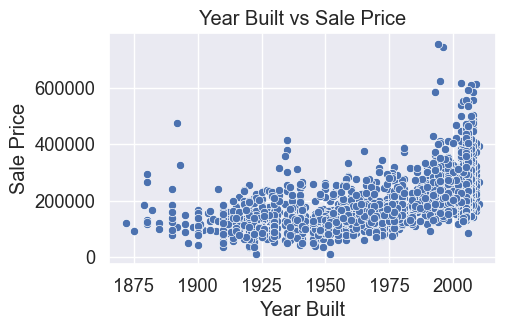

In [96]:
# Strong numerical predictors
num_features = ["Overall Qual", "Gr Liv Area", "Garage Area", "Year Built"]

for col in num_features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=house, x=house[col], y=house["SalePrice"])
    plt.title(f"{col} vs Sale Price")
    plt.xlabel(f"{col}")
    plt.ylabel("Sale Price")
    plt.show()


**Insights & Predictive Value**

* **Overall Qual:** Strongest predictor — higher ratings sharply increase price.

* **Gr Liv Area:** Strong linear trend — bigger homes sell for more; watch for outliers.

* **Year Built:** Newer homes generally fetch higher prices, especially post-2000.

* **Garage Area:** Moderate effect; benefit flattens beyond ~1,000 sq ft.


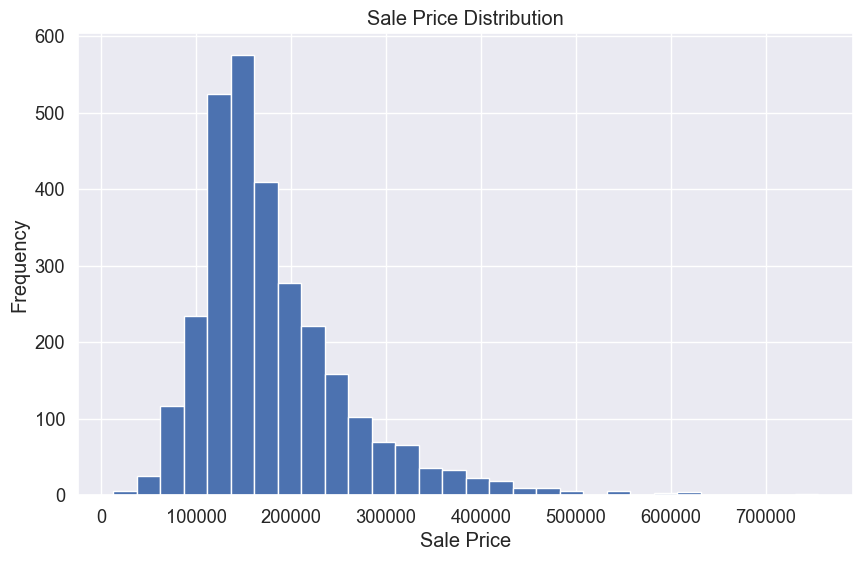

In [94]:
plt.figure(figsize=(10, 6))
house["SalePrice"].plot.hist(bins=30);
plt.xlabel("Sale Price")
plt.title("Sale Price Distribution");

**Insight:** This histogram shows that most house sale prices fall between 100,000 and 200,000, with the highest concentration around 150,000–160,000. The distribution is right-skewed, indicating that while most homes are moderately priced, there are some high-priced outliers above 400,000.

In [20]:
house["SalePrice"].skew()

1.7435000757376466

## Preprocessing 

In [21]:
house1 = house.copy()

In [22]:
house1 = house1.drop(columns=house.select_dtypes("bool").columns)

In [23]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [24]:
## drop order and PID because they have no correlation to sale price
house1 = house1.drop(["Order", "PID"], axis=1)
house1

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,GdPrv,None,0,3,2006,WD,Normal,142500
2926,20,RL,74.0,8885,Pave,None,IR1,Low,AllPub,Inside,...,0,None,MnPrv,None,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2006,WD,Normal,170000


In [25]:
## ordinal mapping
ordinal_order = {
    "Exter Qual":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "Exter Cond":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Qual":      ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Cond":      ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Exposure":  ["None", "No", "Mn", "Av", "Gd"],
    "BsmtFin Type 1": ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin Type 2": ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Heating QC":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "Kitchen Qual":   ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional":     ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "Fireplace Qu":   ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Garage Finish":  ["None", "Unf", "RFn", "Fin"],
    "Garage Qual":    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Garage Cond":    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Paved Drive":    ["N", "P", "Y"],
    "Pool QC":        ["None", "Fa", "TA", "Gd", "Ex"],
    "Fence":          ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"]
}

for col, order in ordinal_order.items():
    house1[col] = pd.Categorical(house[col], categories=order, ordered=True).codes



In [26]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_cols = house1.select_dtypes("object").columns.tolist()
num_cols = house1.select_dtypes("number").columns.tolist()

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("encode", cat_pipeline, cat_cols)
], remainder="passthrough")

house1_transform = preprocessor.fit_transform(house1)


In [28]:
cat_trace = preprocessor.named_transformers_["encode"].named_steps["onehot"]
cat_features = cat_trace.get_feature_names_out(cat_cols)
col_names = list(cat_features) + list(num_cols)
col_names

house_new = pd.DataFrame(house1_transform, columns=col_names)
house_new

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,215000.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,120.0,0.0,0.0,3.0,0.0,6.0,2010.0,105000.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,172000.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,244000.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2010.0,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,2006.0,142500.0
2926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,2006.0,131000.0
2927,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,700.0,7.0,2006.0,132000.0
2928,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,170000.0


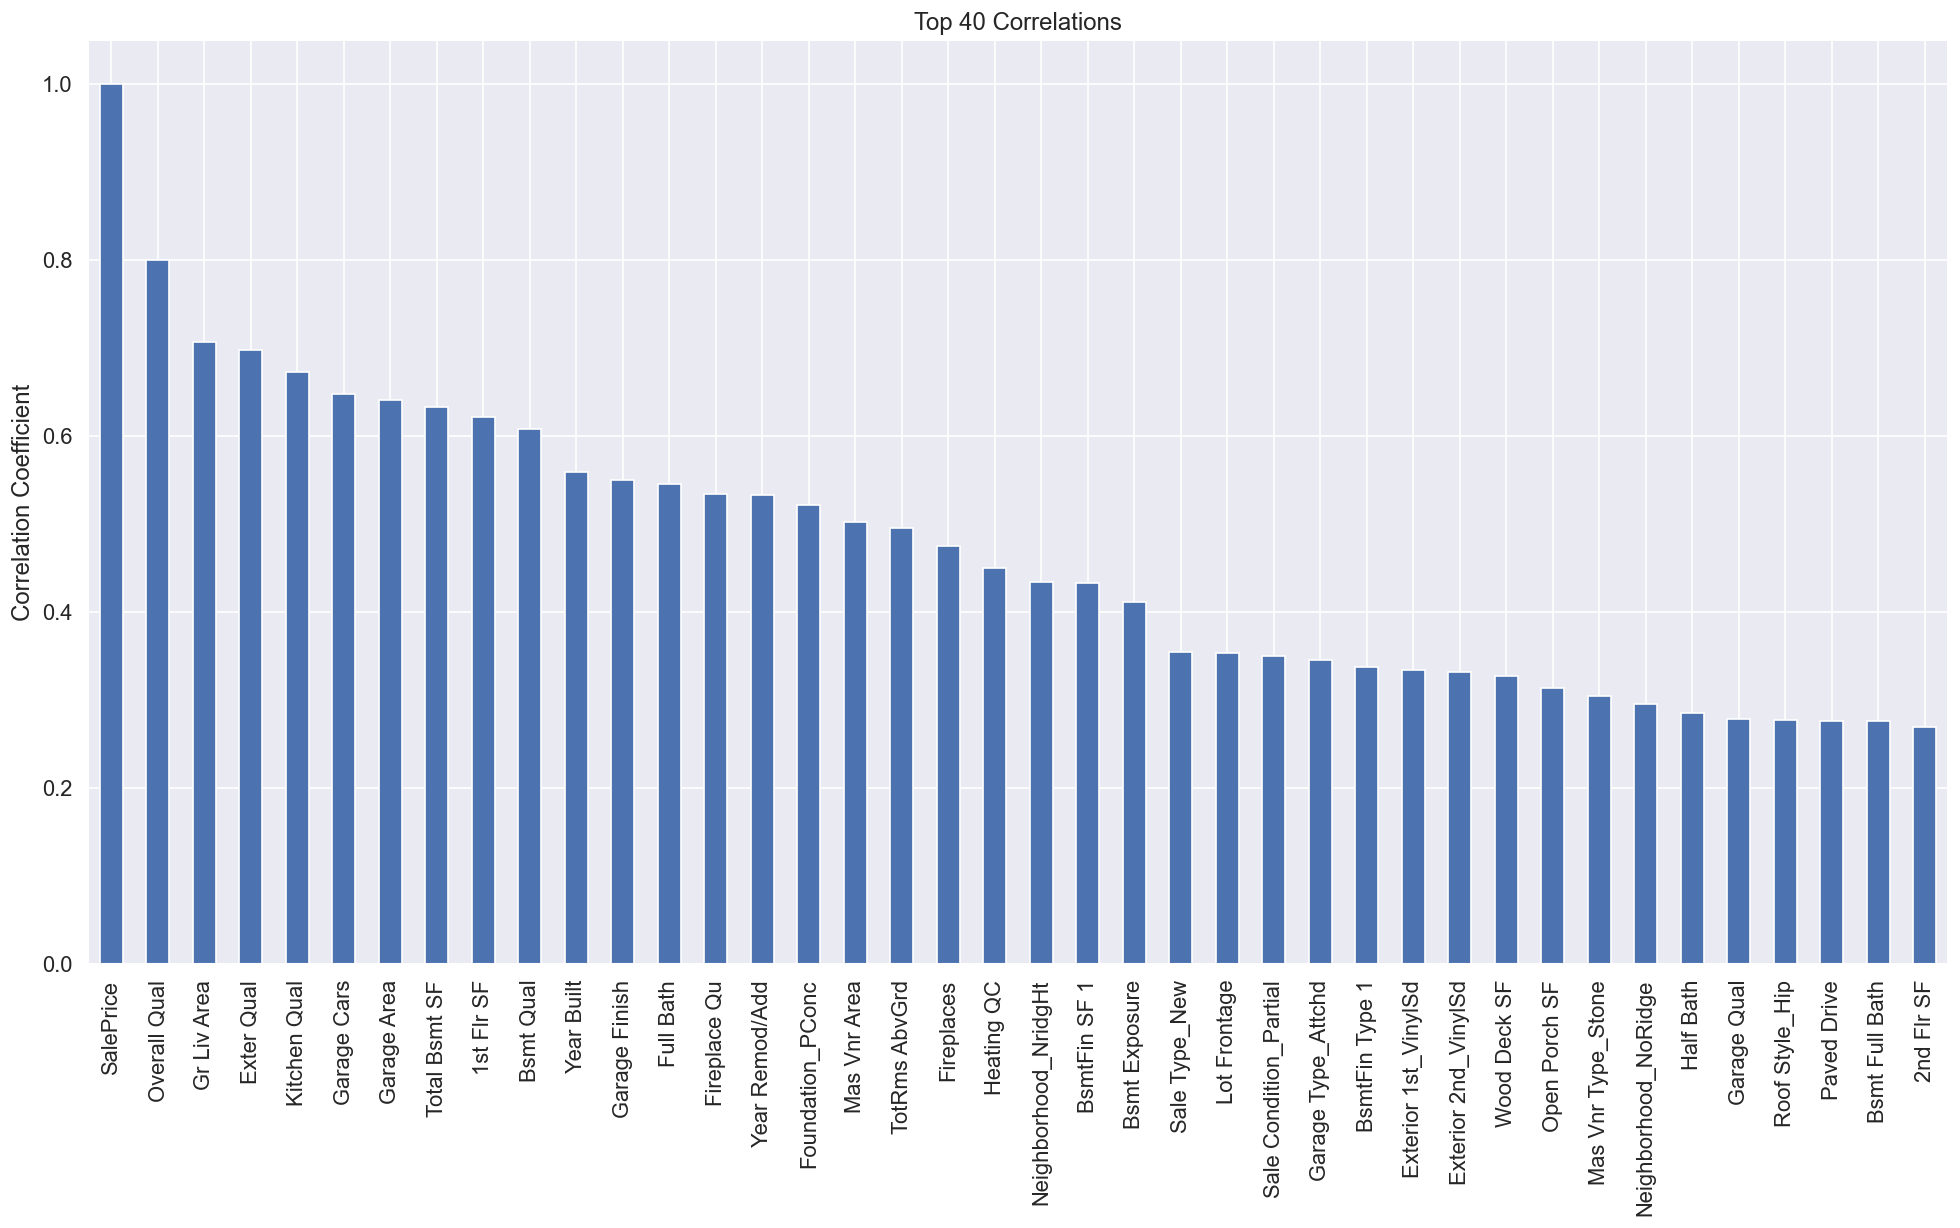

In [108]:
correlation = house_new.corr()["SalePrice"].sort_values(ascending=False)

# Plot top 40 correlated features
plt.figure(figsize=(20, 10), dpi=120)
correlation[:40].plot.bar()
plt.title("Top 40 Correlations")
plt.ylabel("Correlation Coefficient")

# Save before showing
plt.savefig("Correlation_BarChart.png", dpi=80, bbox_inches="tight")
plt.show()

**Insight:** Features such as Overall Quality, Above Ground Living Area, and Exterior Quality exhibit the strongest positive correlations in the dataset. This indicates that larger and higher-quality homes tend to be more valuable, while certain location and condition-related variables also play a significant role in determining property value.

## Model Training

In [30]:
## split data to training and test set
from sklearn.model_selection import train_test_split
X = house_new.drop("SalePrice", axis=1)
y = house_new["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2344, 242), (586, 242), (2344,), (586,))

I will be using RandomForestRegressor and XGBoost Regressor to train this Data

In [31]:

%time
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# instantiate the model 
models = {"RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
         "XGB": XGBRegressor(random_state=42, n_jobs=-1)}

model_score = {}

for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    mae = -np.mean(cross_val_score(model, X, y, scoring="neg_mean_absolute_error"))
    rmse = -np.mean(cross_val_score(model, X, y, scoring="neg_root_mean_squared_error"))

    model_score[model_name] = {"train R^2": train_score,
                               "test R^2": test_score,
                               "MAE": mae,
                               "RMSE": rmse}

model_score



CPU times: total: 0 ns
Wall time: 0 ns


{'RandomForest': {'train R^2': 0.9825839446096852,
  'test R^2': 0.9134980697453637,
  'MAE': 16006.46630602958,
  'RMSE': 26584.008615777748},
 'XGB': {'train R^2': 0.9982973815833026,
  'test R^2': 0.9257500763069288,
  'MAE': 15966.193550687927,
  'RMSE': 25878.914512677344}}

In [32]:
pd.DataFrame(model_score).T

,train R^2,test R^2,MAE,RMSE
RandomForest,0.982584,0.913498,16006.466306,26584.008616
XGB,0.998297,0.925750,15966.193551,25878.914513


## Key Insights:

**1. Model Fit and Generalization**

* Both models achieve high R² scores, explaining over 91% of the variance in house prices on the test set.

* XGBoost slightly outperforms RandomForest with a higher test R² (0.926 vs 0.913), indicating better generalization.

**2. Prediction Accuracy (MAE)**

* MAE is approximately 16k for both models → on average, house price predictions are off by about $16,000.

* This level of error is reasonable considering the wide range of property prices in the dataset.

**3. Error Sensitivity (RMSE)**

* RMSE is approximately 26k (RandomForest) and $25.9k (XGB) → occasional larger errors exist, likely on high-value properties.

* XGBoost has a slightly lower RMSE, meaning it handles outlier predictions better.

**4. Overfitting Observation**

* XGBoost has an extremely high Train R² (0.998), suggesting it fits training data almost perfectly.

* The 0.072 gap between train and test R² shows mild overfitting, which could be reduced with hyperparameter tuning.

### Conclusion:

XGBoost currently performs best in terms of both R² and error metrics, making it the preferred model for this house price prediction task. I will be tunning both models to compare, reduce errors and improve generalization

## Hyperparameter Tuning (Both Models)

In [33]:
model = XGBRegressor()
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [34]:
from joblib import load, dump

##best_xgb = xgb_model.best_estimator_

##dump(best_xgb, "XGB_MODEL.joblib")

xgb_model = load("XGB_MODEL.joblib")

In [35]:
(X_train.columns == X_test.columns).all() 

True

In [36]:
xgb_preds = xgb_model.predict(X_test)
xgb_train_preds = xgb_model.predict(X_train)

In [37]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def evaluate_model(y_true, y_preds, y_train, y_train_pred):
    MAE = mean_absolute_error(y_true, y_preds)
    RMSE = root_mean_squared_error(y_true, y_preds)
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_true, y_preds)

    model_metrics = {"train R^2": train_score,
                     "test R^2": test_score,
                     "MAE": MAE,
                     "RMSE": RMSE}

    return model_metrics

xgb_metrics = evaluate_model(y_test, xgb_preds, y_train, xgb_train_preds)
xgb_metrics
    

{'train R^2': 0.9897250252720202,
 'test R^2': 0.9277034758802819,
 'MAE': 14291.1327225096,
 'RMSE': 24075.731502238283}

In [38]:
rf_model = load("RandomForest_Model.joblib")

rf_preds = rf_model.predict(X_test)
rf_train_preds = rf_model.predict(X_train)

rf_metrics = evaluate_model(y_test, rf_preds, y_train, rf_train_preds)
rf_metrics

{'train R^2': 0.9880319284601374,
 'test R^2': 0.9086974731118336,
 'MAE': 15479.581529359737,
 'RMSE': 27055.912210436913}

In [39]:
pd.DataFrame(data=[rf_metrics, xgb_metrics], index=["RandomForest_tuned", "XGB_tuned"])

,train R^2,test R^2,MAE,RMSE
RandomForest_tuned,0.988032,0.908697,15479.581529,27055.912210
XGB_tuned,0.989725,0.927703,14291.132723,24075.731502


## Key Insights

Hyperparameter tuning improved both models, but the benefits are more meaningful for `XGBoostRegressor` than for `RandomForestRegressor`.

* **XGBoost_tuned:** Test R² increased slightly (0.9258 → 0.9277) while MAE and RMSE dropped noticeably (MAE: 15,966 → 14,291; RMSE: 25,878.9 → 24,075.7). This indicates the tuned XGBoost generalizes better and yields more accurate price predictions — the reduction in RMSE is especially valuable because it reduces large prediction errors.

* **RandomForest_tuned:** Test R² decreased slightly (0.9135 → 0.9104) despite a small MAE improvement (16,006 → 15,504). RMSE, however, worsened slightly (26,584.0 → 26,799.3), and the train R² (0.9878) is much closer to the test R² than before, indicating reduced overfitting compared to the baseline, but without improving overall predictive power.


XGBoost remains the stronger choice for production, given its improved accuracy and lower error variance after tuning. The tuned Random Forest shows more balanced training vs. test performance but slightly weaker predictive metrics.


## Predicted vs Actual Price Scatter Plot

In [40]:
pd.DataFrame(data=[xgb_preds, y_test], index=["Predicted Sale Prices", "Actual Sale Prices"]).T

,Predicted Sale Prices,Actual Sale Prices
0,171032.281250,161000.0
1,106014.632812,116000.0
2,183716.734375,196500.0
3,126631.523438,123600.0
4,117035.710938,126000.0
...,...,...
581,192236.406250,187500.0
582,466049.625000,552000.0
583,178582.421875,173000.0
584,129110.492188,118500.0


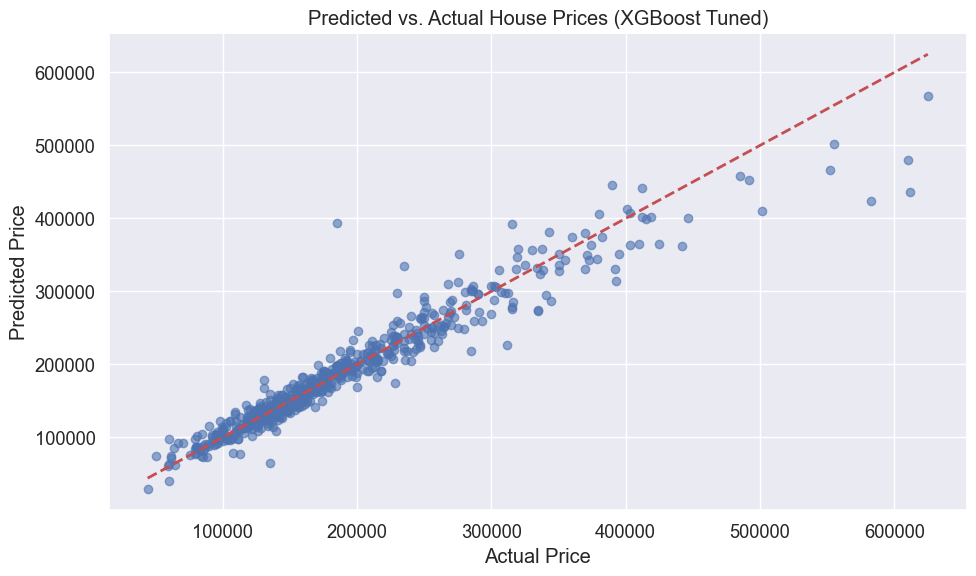

In [107]:
## plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=xgb_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. Actual House Prices (XGBoost Tuned)")
plt.tight_layout()
plt.savefig("Predicted_vs_Actual_Price.png", dpi=80)
plt.show()

**Insight:** The tuned XGBoost model’s predictions closely follow the diagonal reference line, showing strong agreement with actual sale prices. Most points are tightly clustered, indicating good predictive accuracy, with minor deviations for houses at the extreme price ranges.

## Error Distribution Histogram 

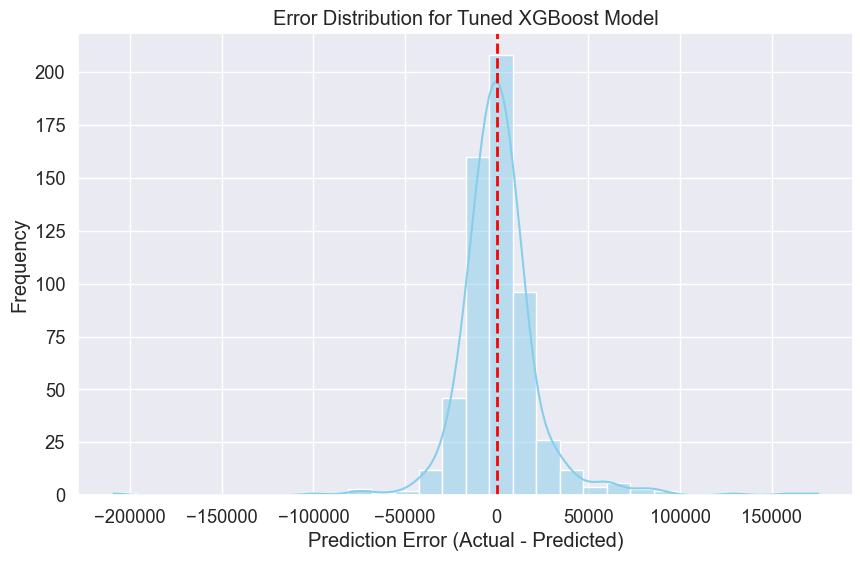

In [42]:
## Calculate residual error
residual = y_test - xgb_preds

## plot the histogram 
plt.figure(figsize=(10, 6))
sns.histplot(residual, bins=30, kde=True, color="skyblue")
plt.axvline(0, color="red", linestyle="--", linewidth=2)

plt.title("Error Distribution for Tuned XGBoost Model")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

**Insight:** Errors are mostly centered near zero, showing low bias. Most predictions are accurate, though a few outliers cause long tails in the distribution.

## Feature Importance

In [43]:
importance = xgb_model.feature_importances_
feature_cols = X_train.columns

feature_importance = pd.DataFrame({"feature": feature_cols,
                                  "importance": importance}).sort_values(by="importance", ascending=False)
feature_importance

,feature,importance
192,Overall Qual,0.240386
197,Exter Qual,0.138155
226,Garage Cars,0.091978
219,Kitchen Qual,0.048505
215,Full Bath,0.037233
...,...,...
114,Exterior 1st_Stone,0.000000
113,Exterior 1st_PreCast,0.000000
110,Exterior 1st_ImStucc,0.000000
107,Exterior 1st_CBlock,0.000000


In [44]:
zero_features = feature_importance[feature_importance["importance"]==0]["feature"]
print(zero_features.tolist())

['Sale Type_VWD', 'Sale Type_ConLw', 'Sale Type_Con', 'Sale Type_ConLD', 'MS Zoning_A (agr)', 'Sale Type_CWD', 'Condition 2_Artery', 'Roof Matl_Membran', 'Roof Matl_ClyTile', 'Roof Style_Shed', 'House Style_SFoyer', 'House Style_2.5Fin', 'House Style_1.5Unf', 'Bldg Type_2fmCon', 'Condition 2_RRNn', 'Condition 2_RRAn', 'Condition 2_RRAe', 'Condition 2_PosN', 'Condition 2_PosA', 'Condition 2_Norm', 'Condition 2_Feedr', 'Condition 1_RRNe', 'Roof Matl_Roll', 'Condition 1_RRAn', 'Condition 1_RRAe', 'Neighborhood_NPkVill', 'Neighborhood_Landmrk', 'Neighborhood_IDOTRR', 'Neighborhood_GrnHill', 'Neighborhood_Greens', 'Neighborhood_BrDale', 'Neighborhood_Blueste', 'Lot Config_FR3', 'Utilities_NoSewr', 'Utilities_NoSeWa', 'Utilities_AllPub', 'MS Zoning_I (all)', 'Roof Matl_Metal', 'Roof Matl_WdShake', 'Misc Feature_TenC', 'Foundation_Wood', 'Misc Feature_Othr', 'Misc Feature_Gar2', 'Misc Feature_Elev', 'Garage Type_2Types', 'Electrical_SBrkr', 'Electrical_Mix', 'Electrical_FuseP', 'Electrical_Fu

In [45]:
feature_importance = feature_importance.set_index("feature")


In [46]:
feature_importance[:10]

,importance
feature,
Overall Qual,0.240386
Exter Qual,0.138155
Garage Cars,0.091978
Kitchen Qual,0.048505
Full Bath,0.037233
Gr Liv Area,0.027268
Bsmt Qual,0.025974
1st Flr SF,0.023007
Central Air_N,0.020756


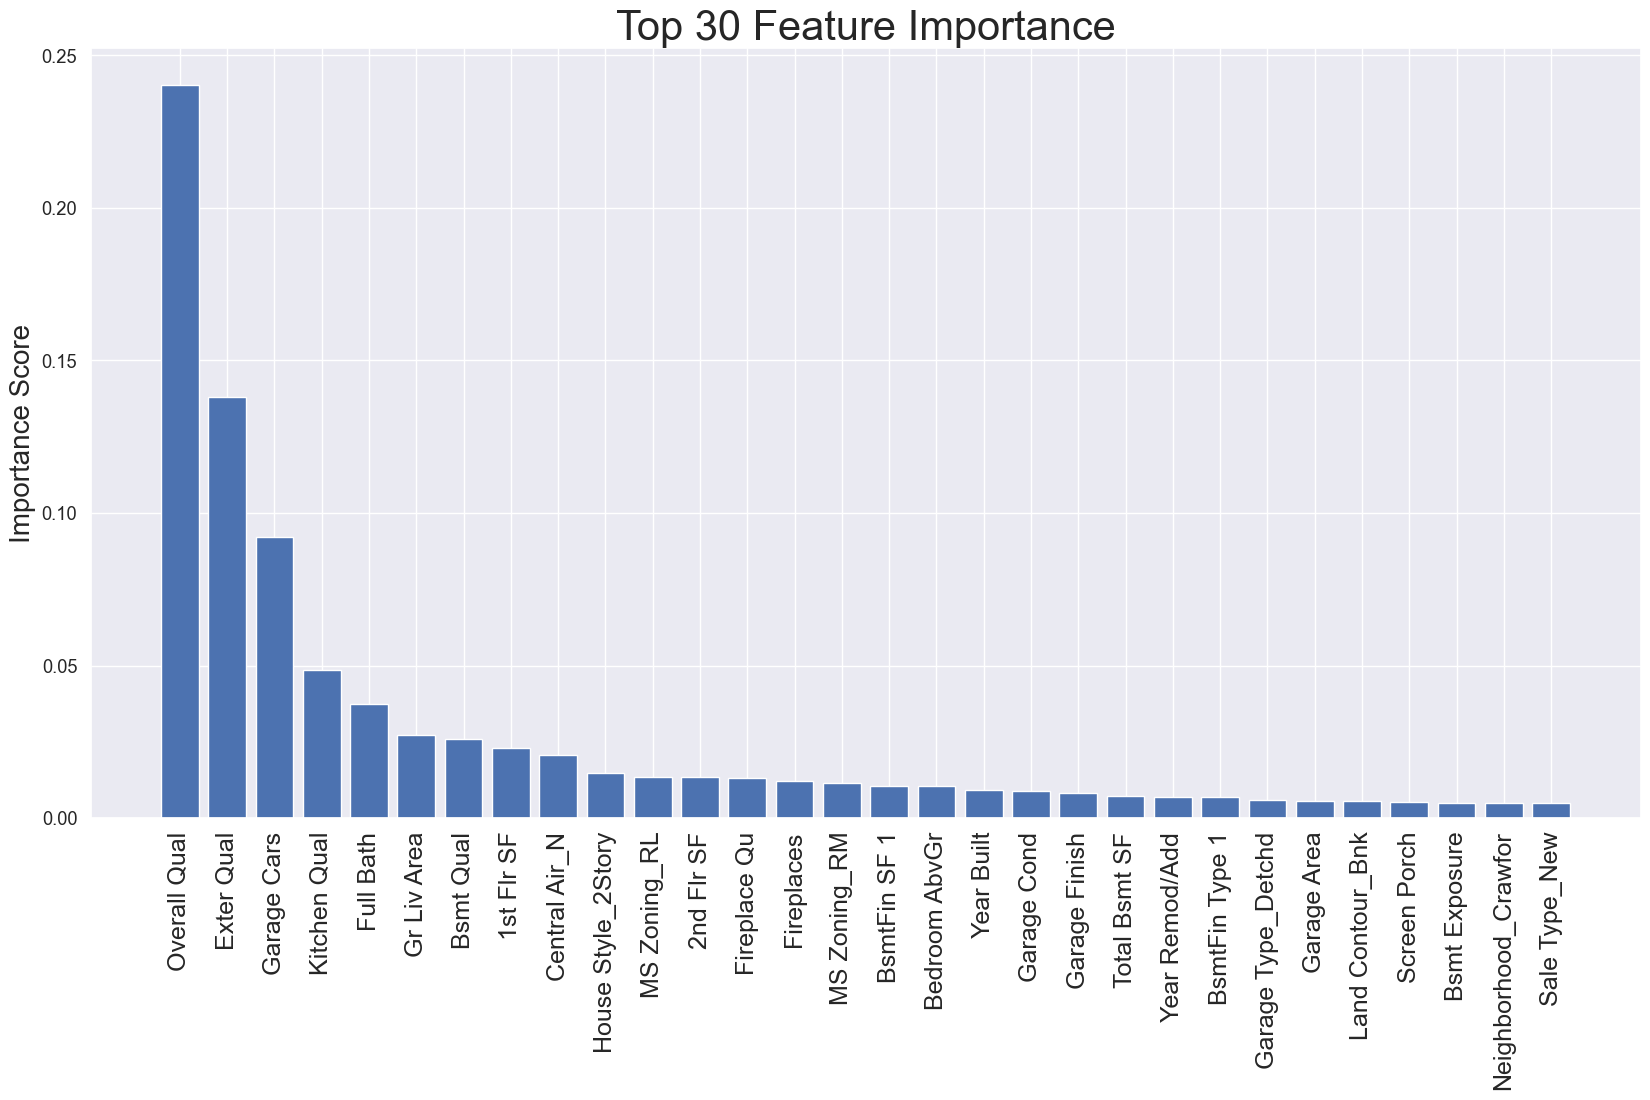

In [47]:
plt.figure(figsize=(20, 10))
plt.bar(feature_importance.index[:30], feature_importance["importance"][:30])

plt.xticks(rotation=90, fontsize=18);
plt.ylabel("Importance Score", fontsize=20)
plt.title("Top 30 Feature Importance", fontsize=30);

## Key Insight

**Top drivers:** Overall Qual, Exter Qual, and Garage Cars dominate, with Overall Qual far ahead.

**Quality & size matter most:** Many top features relate to build quality (Kitchen Qual, Bsmt Qual) and living space (Gr Liv Area, 1st Flr SF).

**Garages are influential:** Capacity, size, and condition all appear.

**Location has moderate impact:** Zoning and neighborhood matter but less than quality and size.

## Business Recommendation

**Prioritize quality upgrades:** Investments in overall build quality, exterior quality, and kitchen upgrades will yield the largest value impact.

**Focus on garage appeal:** Increasing garage capacity and improving its condition can significantly boost property value.

**Optimize space:** Enhancing usable living area (e.g., finishing basements or optimizing floor layouts) adds measurable value.

**Targeted improvements:** Location factors can’t be changed, so resources are best spent on quality and functional upgrades rather than minor aesthetic changes to low-impact features.

# Conclusion

`XGBoostRegressor` demonstrates strong predictive power, capturing over 92% of the variance in house prices on unseen data, with relatively low prediction errors. Key value drivers identified include `overall construction quality`, `exterior quality`, `garage capacity`, and `kitchen quality`, providing actionable insights for stakeholders in real estate investment and property development.
With these results, the tuned XGBoost model is well-suited for deployment, enabling data-driven decision-making for pricing strategies, market analysis, and investment planning.

In [48]:
X_train.to_csv("train_data.csv")

In [49]:
median = X_train.median()

In [50]:
median

MS Zoning_A (agr)       0.0
MS Zoning_C (all)       0.0
MS Zoning_FV            0.0
MS Zoning_I (all)       0.0
MS Zoning_RH            0.0
                      ...  
Pool QC                 0.0
Fence                   0.0
Misc Val                0.0
Mo Sold                 6.0
Yr Sold              2008.0
Length: 242, dtype: float64

## Pipeline Model for Deployment

In [55]:
house1

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,3,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,0,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,3,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,4,None,0,3,2006,WD,Normal,142500
2926,20,RL,74.0,8885,Pave,None,IR1,Low,AllPub,Inside,...,0,0,3,None,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,3,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,4,2006,WD,Normal,170000


In [64]:
X = house1.drop("SalePrice", axis=1)
y = house1["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
X_test

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1357,70,RM,60.0,5100,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,3,None,0,6,2008,WD,Normal
2367,160,RM,21.0,1890,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,None,0,7,2006,WD,Normal
2822,60,RL,62.0,7162,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,None,0,5,2006,WD,Normal
2126,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,None,0,8,2007,WD,Normal
1544,30,RM,50.0,7000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,3,None,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,80,RL,73.0,9590,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,0,None,0,5,2007,WD,Normal
456,20,RL,100.0,14836,Pave,None,IR1,HLS,AllPub,Inside,...,0,0,0,0,None,0,2,2009,WD,Abnorml
462,120,RL,48.0,3480,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,None,0,11,2009,WD,Normal
2168,85,RL,75.0,9825,Pave,None,Reg,Low,AllPub,Inside,...,0,0,0,0,Shed,450,8,2007,WD,Abnorml


In [66]:
cat_cols = house1.select_dtypes("object").columns.tolist()
num_cols = house1.select_dtypes("number").columns.tolist()

one_hot = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ("one_hot", one_hot, cat_cols)
], remainder="passthrough")

model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("xgb_model", xgb_model)
])

model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('xgb_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('one_hot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
y_preds = model_pipeline.predict(X_test)
y_train_preds = model_pipeline.predict(X_train)

In [69]:
evaluate_model(y_test, y_preds, y_train, y_train_preds)

{'train R^2': 0.9897956252098083,
 'test R^2': 0.9259757399559021,
 'MAE': 14181.0302734375,
 'RMSE': 24361.716796875}

In [70]:
dump(model_pipeline, "XGBMODEL_pipeline.joblib")

['XGBMODEL_pipeline.joblib']

In [71]:
X_train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [72]:
X_train.to_csv("train_data.csv")